### Prophet exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


In [4]:
wmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11815 non-null  object 
 1   Open       11815 non-null  float64
 2   High       11815 non-null  float64
 3   Low        11815 non-null  float64
 4   Close      11815 non-null  float64
 5   Adj Close  11815 non-null  float64
 6   Volume     11815 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 646.3+ KB


* use only the `Date` and `Adj Close` columns

In [5]:
wmt = wmt[['Date', 'Adj Close']]

* rename columns to fit the Prophet naming convention

In [6]:
wmt.rename(columns={'Date':'ds','Adj Close':'y'}, inplace=True)

* convert date to datetime

In [7]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

* plot time-series

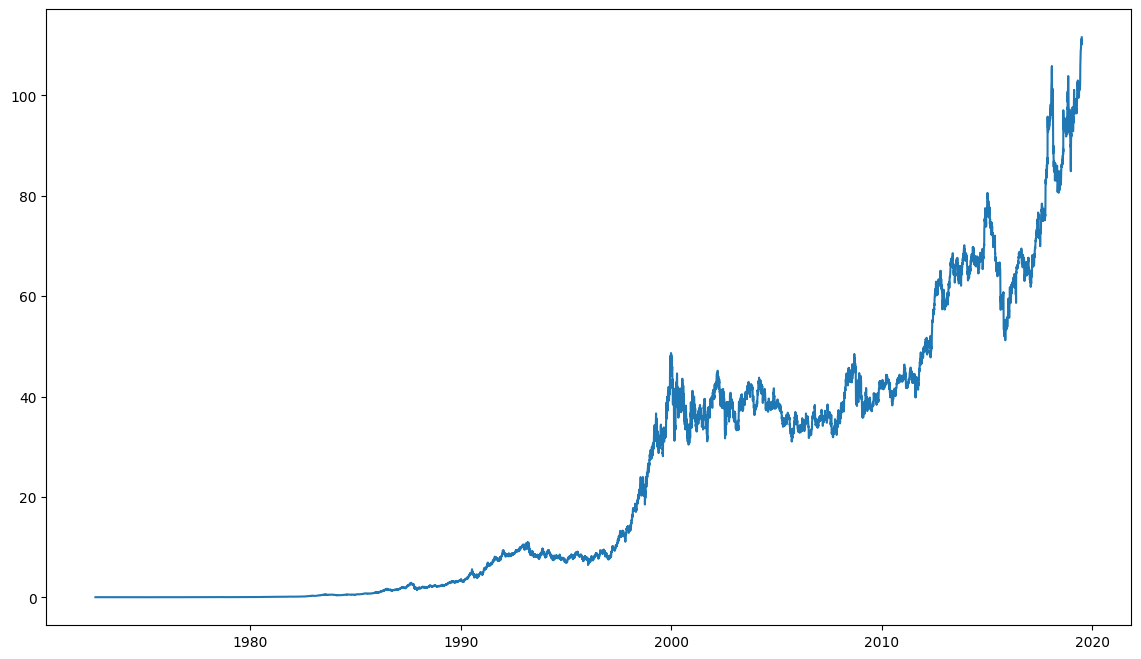

In [8]:
plt.figure(figsize = (14,8))
plt.plot(wmt['ds'], wmt['y'])
plt.show()

* instantiate Prophet

In [9]:
m = Prophet()

* fit model

In [10]:
m.fit(wmt)

13:21:22 - cmdstanpy - INFO - Chain [1] start processing
13:21:30 - cmdstanpy - INFO - Chain [1] done processing


* forecast 365 values into the future 

In [12]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

* plot forecast

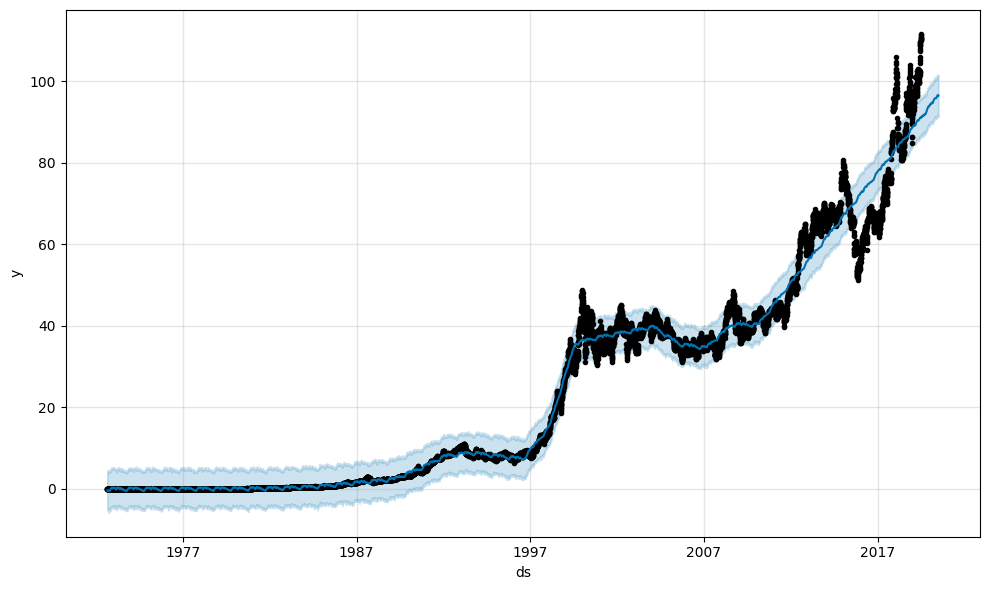

In [13]:
fig1 = m.plot(forecast)

* plot components

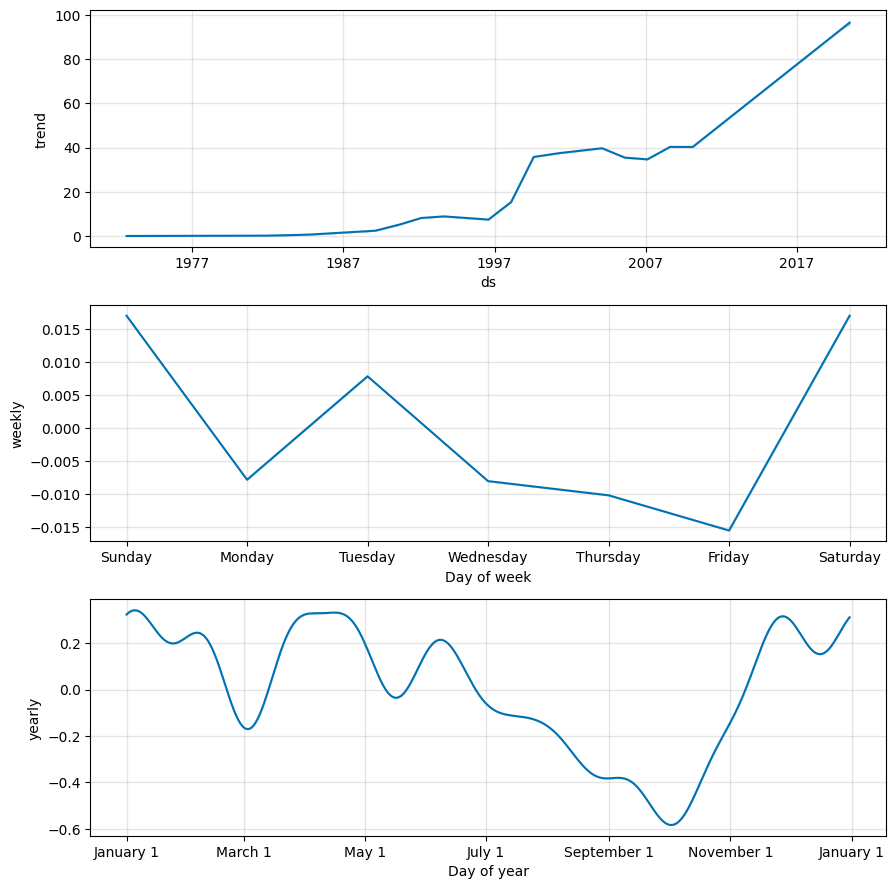

In [14]:
fig2 = m.plot_components(forecast)

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.